# 📓 Notebook - Teori & Praktik Bab 6: Decision Trees

Selamat datang di notebook panduan untuk Bab 6! Bab ini berfokus pada **Decision Trees (Pohon Keputusan)**.

Decision Trees adalah salah satu algoritma yang paling intuitif dan mudah ditafsirkan. Mereka sangat serbaguna dan dapat melakukan tugas klasifikasi, regresi, dan bahkan multi-output. Mereka juga merupakan blok bangunan dasar dari **Random Forests**, salah satu ansambel paling kuat yang ada.

In [1]:
!pip install graphviz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

try:
    import graphviz
except ImportError:
    print("Library graphviz tidak ditemukan. Silakan install dengan 'pip install graphviz'")
    graphviz = None

# Fungsi untuk mem-plot decision boundary (akan kita gunakan nanti)
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='Pastel2')
    if not iris:
        plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "yo", label="Iris virginica")
    plt.axis(axes)
    if iris:
        plt.xlabel("Petal length (cm)", fontsize=14)
        plt.ylabel("Petal width (cm)", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

## 1. Pelatihan dan Visualisasi Decision Tree

**Teori :**
Mari kita mulai dengan melatih `DecisionTreeClassifier` pada dataset Iris yang terkenal. Dataset ini berisi 3 kelas (Setosa, Versicolor, Virginica) berdasarkan fitur panjang dan lebar sepal serta petal.

Kita akan melatih pohon hanya pada dua fitur (panjang dan lebar petal) agar mudah divisualisasikan.

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print("Model Decision Tree berhasil dilatih!")

Model Decision Tree berhasil dilatih!


**Teori :**

Salah satu keunggulan terbesar Decision Trees adalah kemampuannya untuk divisualisasikan. Model ini bukanlah "kotak hitam" (*black box*). Kita bisa melihat dengan jelas aturan-aturan yang dipelajarinya.

Kita akan menggunakan `export_graphviz` untuk membuat file `.dot` yang mendeskripsikan pohon kita, lalu `graphviz` untuk menampilkannya di notebook.

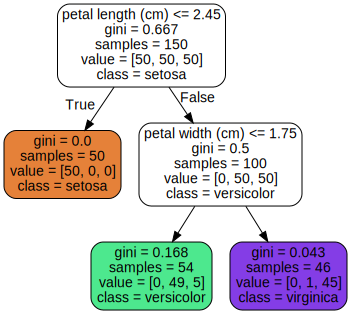

In [ ]:
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

if graphviz:
    with open("iris_tree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
else:
    print("Silakan install 'graphviz' untuk melihat visualisasi pohon.")

## 2. Membuat Prediksi (Cara Membaca Pohon)

**Teori :**

Bagaimana cara membaca pohon di atas untuk membuat prediksi? Mari kita telusuri sebuah data baru, misalnya bunga dengan *petal length = 5 cm* dan *petal width = 1.5 cm*.

1.  **Node 0 (Root/Akar):** `petal length (cm) <= 2.45`? Jawabannya `False` (karena 5 > 2.45). Kita pindah ke anak *kanan* (Node 2).
2.  **Node 2 (Depth 1):** `petal width (cm) <= 1.75`? Jawabannya `True` (karena 1.5 <= 1.75). Kita pindah ke anak *kiri* (Node 3).
3.  **Node 3 (Depth 2):** Ini adalah **leaf node** (node daun) karena tidak punya anak. Ia memprediksi kelas **`versicolor`**.

**Istilah-istilah pada Node:**
* **`samples`**: Jumlah data latih yang "jatuh" ke node ini. (Node 0 memiliki 150 sampel, yaitu semua data).
* **`value`**: Distribusi kelas dari `samples` tersebut. (Node 3 memiliki `[0, 49, 5]`, artinya 0 Setosa, 49 Versicolor, 5 Virginica).
* **`class`**: Kelas mayoritas di node tersebut, yang menjadi prediksinya. (Di Node 3, mayoritas adalah `versicolor`).
* **`gini`**: **Gini Impurity**. Ini adalah ukuran "ketidakmurnian" sebuah node. 
    * Gini = 0 berarti node itu *pure* (murni), hanya berisi satu kelas (contoh: Node 1 untuk Setosa).
    * Gini tinggi (maks 0.667 untuk 3 kelas) berarti kelas-kelasnya tercampur.

In [ ]:

prediksi = tree_clf.predict([[5, 1.5]])
print(f"Prediksi untuk [5, 1.5]: {iris.target_names[prediksi][0]}")

Prediksi untuk [5, 1.5]: versicolor


### Plot Batas Keputusan (Decision Boundaries)
Kita bisa memvisualisasikan aturan-aturan ini sebagai garis-garis di plot.

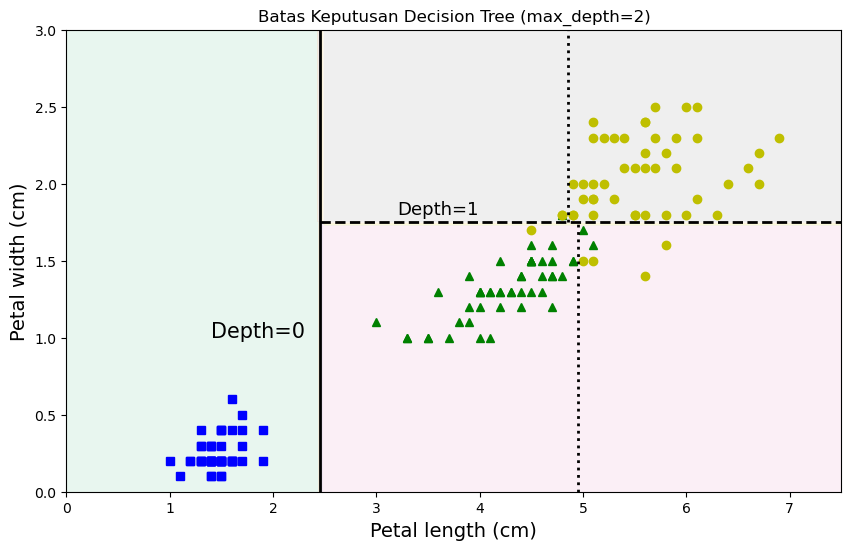

In [ ]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3], iris=True)

# Garis putus-putus menunjukkan batas keputusan yang dipelajari pohon
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.title("Batas Keputusan Decision Tree (max_depth=2)")
plt.show()

## 3. Mengestimasi Probabilitas Kelas

**Teori :**

Decision Tree juga bisa mengestimasi probabilitas sebuah instance termasuk dalam kelas tertentu.

Caranya adalah dengan melihat rasio kelas di *leaf node* tempat instance itu berakhir. Untuk contoh kita tadi (panjang 5, lebar 1.5), ia jatuh di **Node 3**.

Node 3 memiliki `value = [0, 49, 5]` dan `samples = 54`.

Maka, estimasi probabilitasnya adalah:
-   **Setosa:** 0 / 54 = 0%
-   **Versicolor:** 49 / 54 = 90.7%
-   **Virginica:** 5 / 54 = 9.3%

In [ ]:

proba = tree_clf.predict_proba([[5, 1.5]])
print(f"Probabilitas untuk [5, 1.5]: {proba}")
print(f"Kelas yang diprediksi: {iris.target_names[np.argmax(proba)]}")

Probabilitas untuk [5, 1.5]: [[0.         0.90740741 0.09259259]]
Kelas yang diprediksi: versicolor


## 4. Algoritma Pelatihan CART & Regularisasi

**Teori :**

Scikit-Learn menggunakan algoritma **CART (Classification and Regression Tree)** untuk melatih Decision Trees. Ini adalah **algoritma serakah (greedy algorithm)**.

1.  **Cara Kerja:** Algoritma ini memindai semua fitur (misal, petal length) dan semua *threshold* (misal, 2.45 cm). Ia memilih pasangan fitur `k` dan threshold `tk` yang menghasilkan *split* (pembagian) paling "murni".
2.  **Fungsi Biaya (Cost Function) CART untuk Klasifikasi:** Ia mencoba meminimalkan Gini Impurity. Tujuannya adalah membuat anak-anak node se-murni mungkin.
    $J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
3.  **Greedy:** Disebut "serakah" karena ia mencari *split* terbaik di level saat ini, tanpa memikirkan apakah *split* ini akan tetap menjadi yang terbaik di level-level berikutnya. Ini membuat algoritma cepat, tetapi mungkin tidak menghasilkan pohon yang optimal secara global.
4.  **Overfitting:** Karena algoritma ini terus mem-partisi data sampai setiap *leaf* murni, ia akan sangat mudah **overfitting** jika tidak dibatasi. Ia akan beradaptasi terlalu dekat dengan data latih, termasuk noise-nya.

### 5. Hyperparameter Regularisasi

**Teori :**

Untuk menghindari *overfitting*, kita harus **meregulasi** (membatasi) Decision Tree. Ini dilakukan melalui hyperparameter saat pembuatan model. Yang paling umum adalah:

* **`max_depth`**: (Paling umum) Membatasi kedalaman maksimum pohon. `None` berarti tidak terbatas. Mengurangi nilai ini akan meningkatkan regularisasi.
* **`min_samples_split`**: Jumlah minimum sampel yang harus ada di *node* sebelum node itu boleh di-split. Meningkatkan nilai ini akan meningkatkan regularisasi.
* **`min_samples_leaf`**: Jumlah minimum sampel yang harus ada di *leaf node* (node akhir). Meningkatkan nilai ini akan meningkatkan regularisasi.
* **`max_leaf_nodes`**: Membatasi jumlah total *leaf node*. `None` berarti tidak terbatas.

Mari kita lihat perbandingan pohon yang tidak diregulasi (overfitting) dengan pohon yang diregulasi.

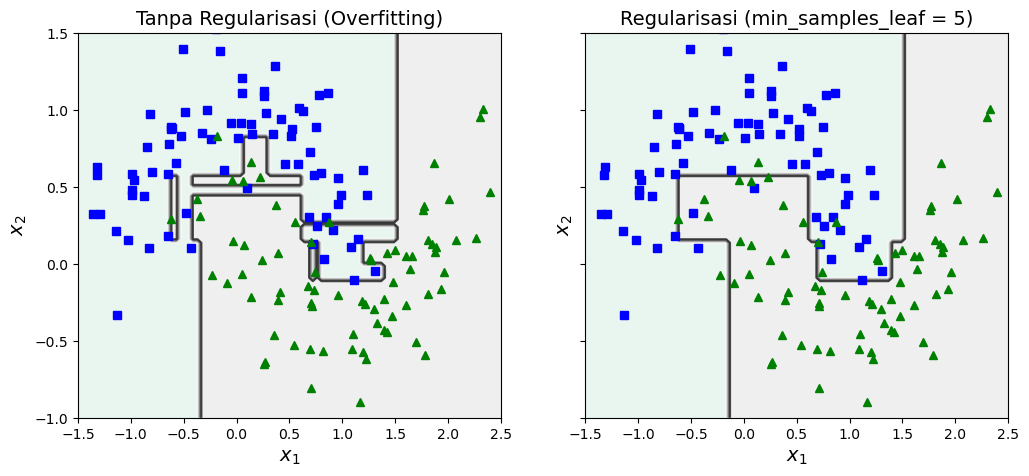

In [ ]:
# Gunakan dataset 'moons' yang non-linear
Xm, ym = make_moons(n_samples=150, noise=0.25, random_state=42)
axes_m = [-1.5, 2.5, -1, 1.5]

# Model 1: Tidak diregulasi (default)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(Xm, ym)

# Model 2: Diregulasi (membatasi sampel minimum di leaf)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf2.fit(Xm, ym)

# Plot perbandingan
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf1, Xm, ym, axes=axes_m, iris=False, plot_training=True)
plt.title("Tanpa Regularisasi (Overfitting)", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(tree_clf2, Xm, ym, axes=axes_m, iris=False, plot_training=True)
plt.title("Regularisasi (min_samples_leaf = 5)", fontsize=14)

plt.show()

# Model di kiri sangat berliku-liku (overfit), mencoba menangkap setiap titik.
# Model di kanan memiliki batas yang jauh lebih mulus dan kemungkinan akan menggeneralisasi lebih baik.

## 6. Decision Trees untuk Regresi

**Teori :**

Decision Trees juga bisa digunakan untuk tugas regresi (memprediksi nilai numerik).

Perbedaannya adalah:
1.  **Cara Split:** Alih-alih meminimalkan Gini (impurity) untuk membuat kelas yang murni, `DecisionTreeRegressor` meminimalkan **MSE (Mean Squared Error)**. Tujuannya adalah membuat prediksi di dalam node sedekat mungkin dengan nilai aktualnya.
2.  **Prediksi (Leaf Node):** Prediksi di *leaf node* bukan lagi kelas, melainkan **nilai rata-rata (mean)** dari semua sampel target yang ada di *leaf* tersebut.

Sama seperti klasifikasi, model regresi ini juga sangat rentan terhadap *overfitting* jika tidak diregulasi.

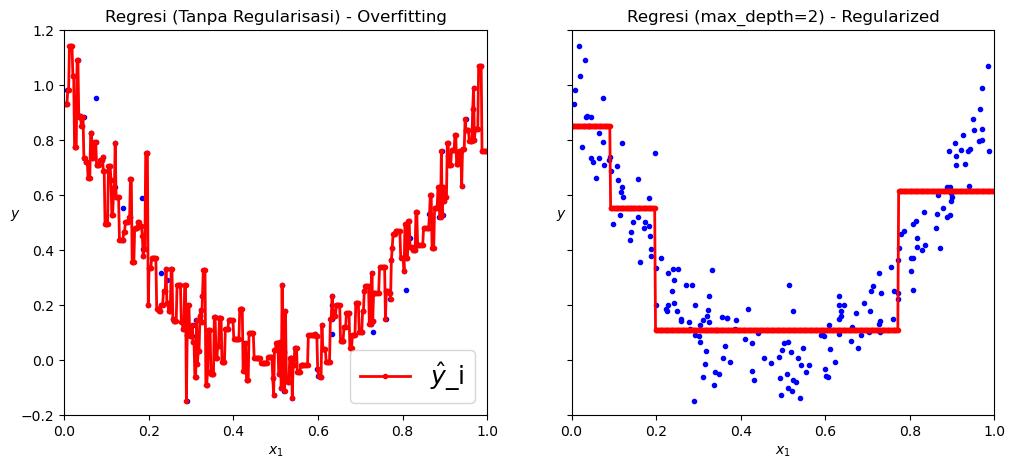

In [ ]:
# Buat data kuadratik acak
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5)**2 + np.random.randn(m, 1) / 10

tree_reg_overfit = DecisionTreeRegressor(random_state=42)
tree_reg_regularized = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg_overfit.fit(X, y)
tree_reg_regularized.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1.2]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$y$", rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$_i")

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg_overfit, X, y)
plt.title("Regresi (Tanpa Regularisasi) - Overfitting")
plt.legend(fontsize=18)

plt.sca(axes[1])
plot_regression_predictions(tree_reg_regularized, X, y)
plt.title("Regresi (max_depth=2) - Regularized")
plt.show()

# Model di kiri (overfitting) sangat presisi mengikuti data latih, 
# sedangkan model di kanan (diregulasi) menangkap tren umum dari data.

## 7. Instabilitas (Kelemahan Utama Decision Trees)

**Teori :**

Decision Trees memiliki dua kelemahan utama:

1.  **Sensitif terhadap Rotasi Data:** Pohon ini lebih suka membuat *split* yang ortogonal (tegak lurus sumbu). Jika data Anda diputar (dirotasi), ia akan kesulitan membuat batas yang sederhana dan menghasilkan batas yang tidak perlu rumit.
2.  **Sensitif terhadap Variasi Data Kecil:** Jika Anda mengubah satu atau dua titik data saja, seluruh struktur pohon bisa berubah drastis. Ini membuatnya tidak stabil.


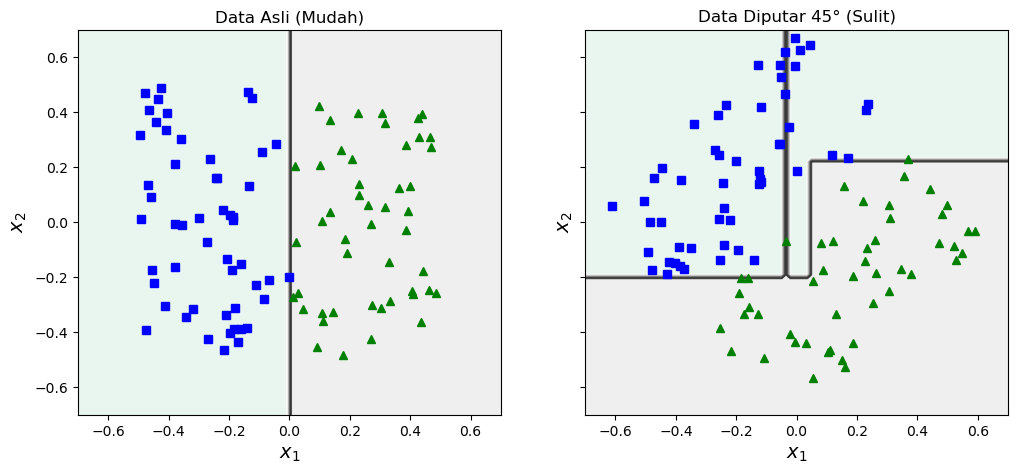

In [ ]:
# Menunjukkan sensitivitas terhadap rotasi data
np.random.seed(42)
X_unrotated = np.random.rand(100, 2) - 0.5
y_unrotated = (X_unrotated[:, 0] > 0).astype(np.float64)

angle = np.pi / 4 # 45 derajat
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
X_rotated = X_unrotated.dot(rotation_matrix)

tree_clf_unrotated = DecisionTreeClassifier(random_state=42)
tree_clf_rotated = DecisionTreeClassifier(random_state=42)
tree_clf_unrotated.fit(X_unrotated, y_unrotated)
tree_clf_rotated.fit(X_rotated, y_unrotated)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf_unrotated, X_unrotated, y_unrotated, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title("Data Asli (Mudah)")

plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated, X_rotated, y_unrotated, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title("Data Diputar 45° (Sulit)")
plt.show()

# Model di kiri menemukan batas lurus sederhana. Model di kanan harus membuat 
# banyak 'tangga' yang tidak perlu untuk memisahkan data yang sama, hanya karena datanya diputar.